In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import lightkurve as lk
from astropy.modeling import models, fitting
from astropy.convolution import convolve, Box1DKernel


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [18]:
# rates = Table.read('../tables/pceb_fit_results_rates.csv')
# names = rates['Target']
# names
coords = np.genfromtxt('../coords_deg.tsv', delimiter='\t', names=True, dtype=None)
ra, dec = coords['RA'], coords['DEC']
# coords

/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.


In [22]:
for i, star in enumerate(coords['Name']):
    print(star)
    search_result = lk.search_lightcurve('{} {}'.format(ra[i], dec[i]))
    print(search_result)
    

b'UZ Sex'
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 35 2021    QLP     600     7983187      0.0
  1 TESS Sector 45 2021   SPOC     120     7983187      0.0
  2 TESS Sector 46 2021   SPOC     120     7983187      0.0
b'CC Cet'
SearchResult containing 9 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 31 2020      SPOC      20   337219837      0.0
  1 TESS Sector 31 2020      SPOC     120   337219837      0.0
  2 TESS Sector 31 2020 TESS-SPOC     600   337219837      0.0
  3 TESS Sector 42 2021      SPOC      20   337219837      0.0
  4 TESS Sector 42 2021      SPOC     120   337219837      0.0
  5 TESS Sector 43 2021      SPO

No data found for target "225.0805225 16.98727937".


SearchResult containing 0 data products.
b'WD 1504+546'


No data found for target "226.5225344 54.47185058".


SearchResult containing 0 data products.
b'WD 2317+268'


No data found for target "350.0169884 27.10657437".


SearchResult containing 0 data products.
b'V727 Car'
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 11 2019   SPOC     120   398365709      0.0
  1 TESS Sector 37 2021   SPOC     120   398365709      0.0
  2 TESS Sector 38 2021   SPOC     120   398365709      0.0
b'WD 0137-349'
SearchResult containing 5 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 03 2018      SPOC     120    32307067      0.0
  1 TESS Sector 03 2018 TESS-SPOC    1800    32307067      0.0
  2 TESS Sector 30 2020      SPOC      20    32307067      0.0
  3 TESS Sector 30 2020      SPOC     120    32307067      0.0
  4 TESS Sector 30 2020 TESS-SPOC     600    32

No data found for target "344.7011951 25.26188584".


SearchResult containing 0 data products.
b'WD2257+162'


No data found for target "344.9450586 16.48791373".


SearchResult containing 0 data products.
b'QS Vir'


No data found for target "207.466864 -13.22686755".


SearchResult containing 0 data products.


b'UZ Sex'


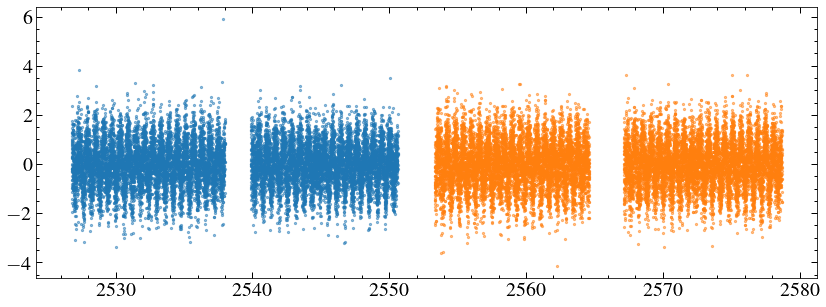

/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


14.346931401341326 h
0.5977888083892219 d


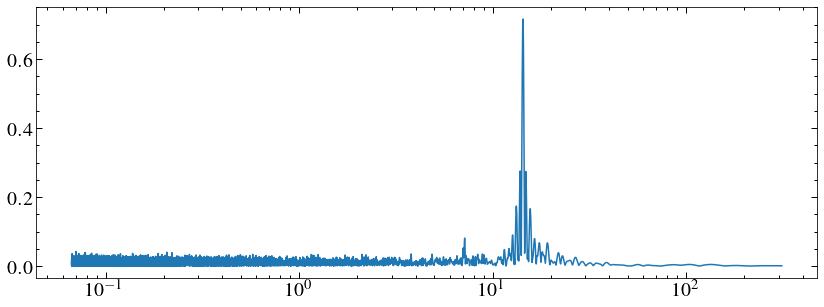

b'CC Cet'


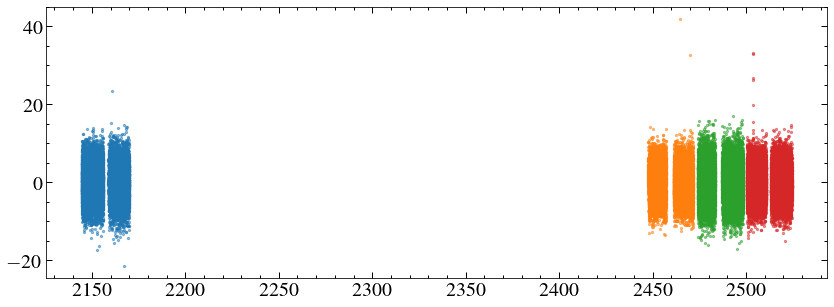

6.883461605242495 h
0.2868109002184373 d


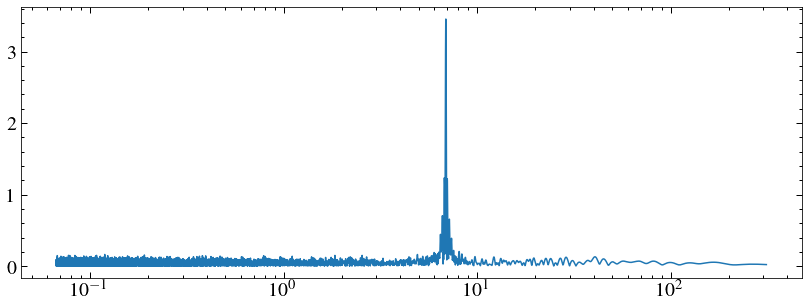

b'LM com'


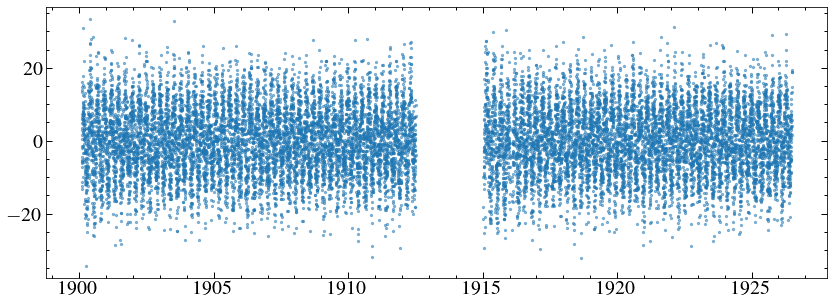

/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


6.206771596380774 h
0.25861548318253225 d


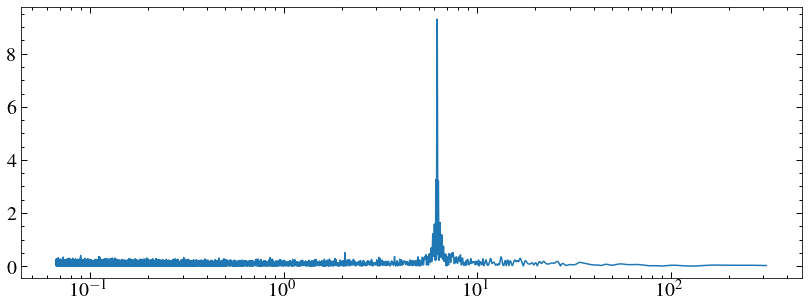

b'EG Uma'


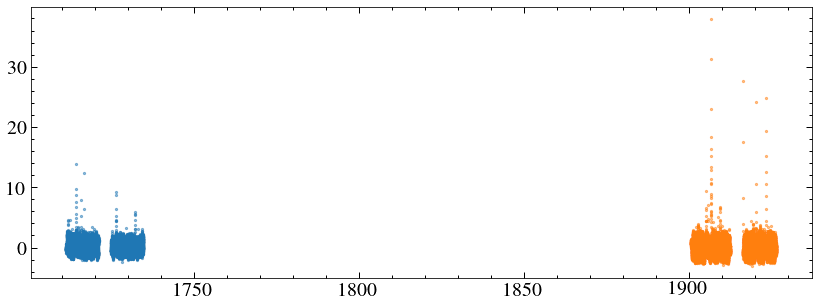

16.019292515233143 h
0.6674705214680476 d


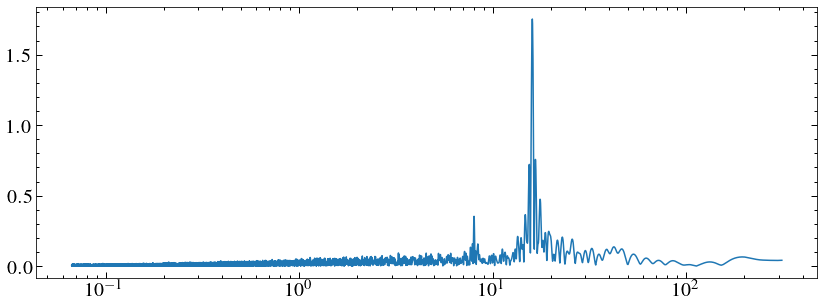

b'EGGR 38'


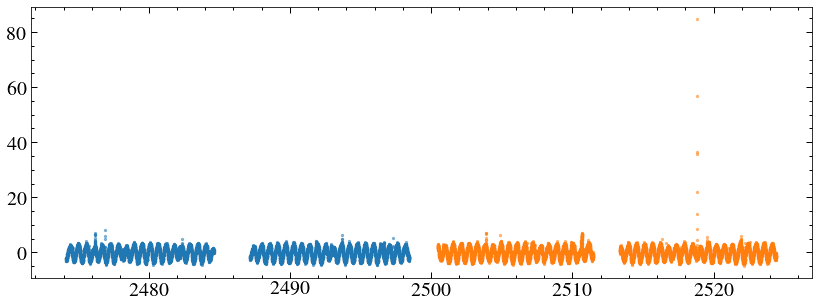

13.53000410125006 h
0.5637501708854192 d


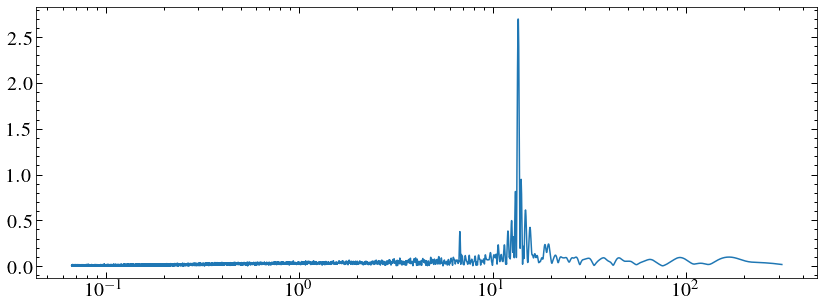

b'WD 1339+606'


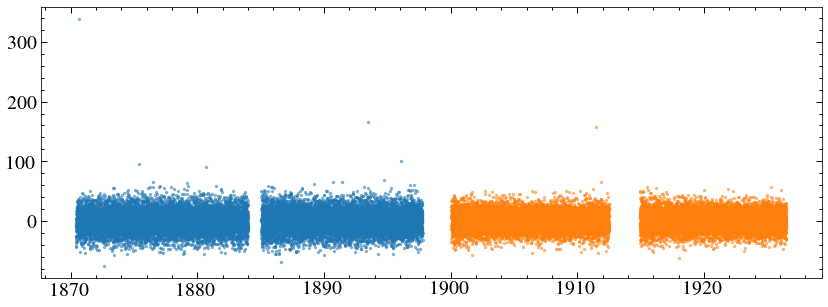

0.14602406638528342 h
0.00608433609938681 d


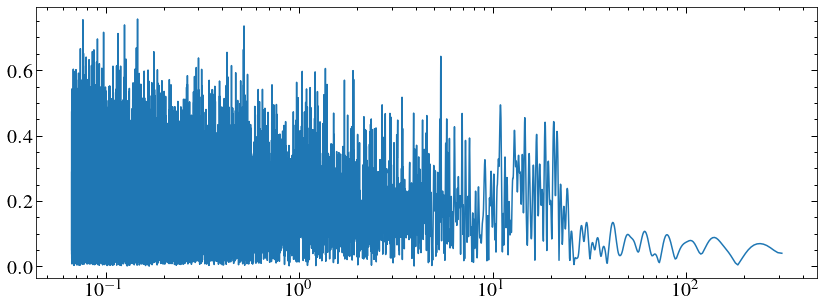

b'WD 1436-216'


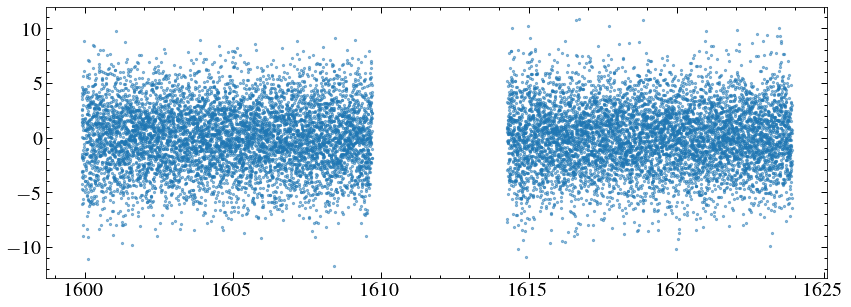

21.789411988190345 h
0.9078921661745978 d


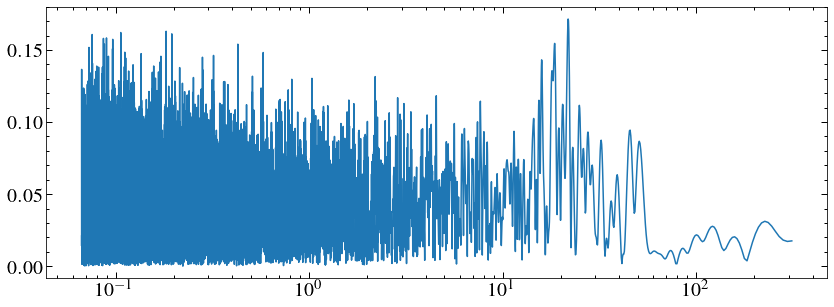

b'WD 1458+171'
b'WD 1504+546'
b'WD 2317+268'
b'V727 Car'


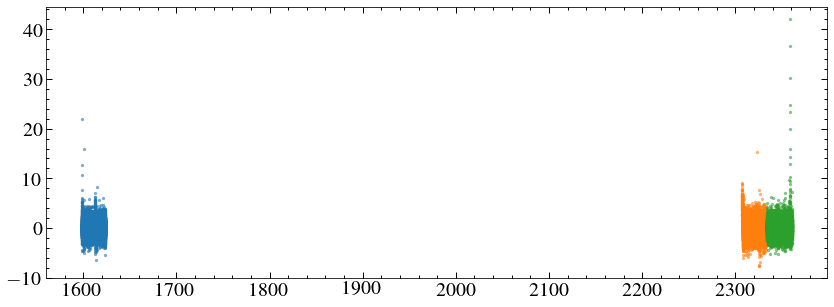

8.084108713203781 h
0.33683786305015756 d


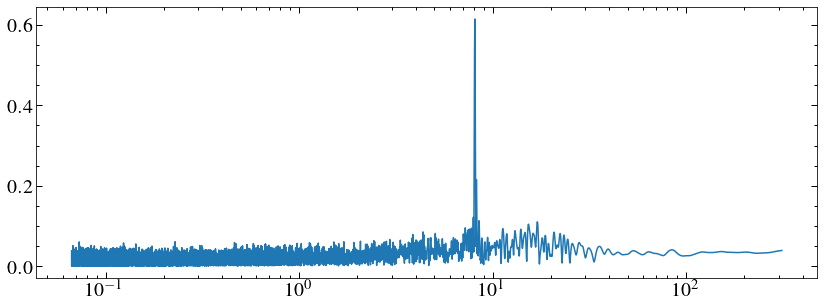

b'WD 0137-349'


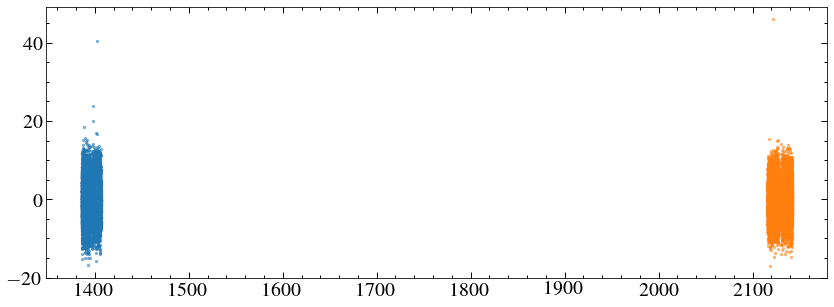

1.9060364626250892 h
0.07941818594271205 d


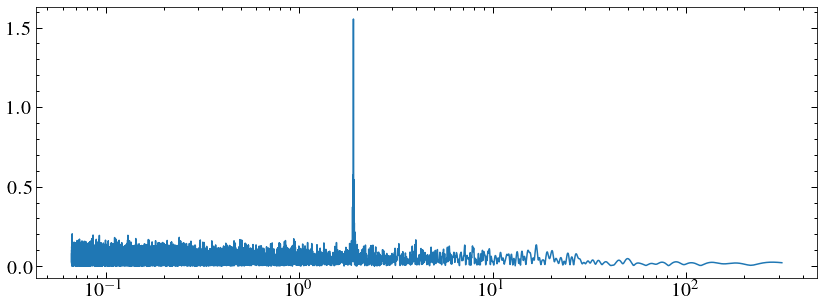

b'HRCam'


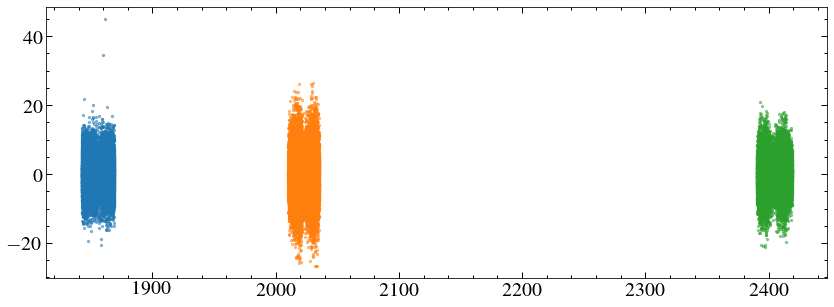

/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.473079981978695 h
0.1030449992491123 d


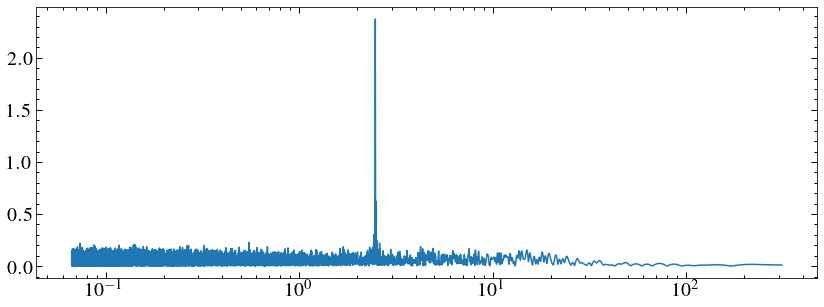

b'MS Peg'
b'WD2257+162'
b'QS Vir'


In [60]:
for i, star in enumerate(coords['Name']):
    print(star)
    search_result = lk.search_lightcurve('{} {}'.format(ra[i], dec[i]))
    if len(search_result) > 0:
        for result in search_result:
            # print(result.exptime)
            n  = 0 
            if result.exptime.value == 120:
                lc = result[0].download(download_dir='data/')
                lc =lc.flatten(1001)
                lc = lc.normalize('percent')
                plt.scatter(lc.time.value, lc.flux.value-100, s=5, alpha = 0.5, rasterized=True)
                if n == 0:
                    lc_all = lc
                else:
                    lc_all.append(lc)
                n += 1
        plt.show()
        pg = pg = lc_all.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
        plt.plot(pg.period.to(u.h), pg.power)
        plt.xscale('log')
        print(pg.period_at_max_power.to(u.h))
        print(pg.period_at_max_power)
        # plt.sh

                
    # if star == b'CC Cet':
        # plt.xlim(2503, 2504)
        plt.show()
                
    